In [1]:
# determine the extreme values of points 
import csv

trajfile = "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"

with open(trajfile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count ==0:
            line_count = line_count+1
            continue
        # init 
        if line_count==1:
            xmax = float(row[6])
            xmin = float(row[6])
            ymax = float(row[7])
            ymin = float(row[7])
        # x, y vals 
        xval = float(row[6])
        yval = float(row[7])
        if xval > xmax:
            xmax = xval
        if xval < xmin:
            xmin = xval
        if yval > ymax:
            ymax = yval
        if yval < ymin:
            ymin = yval
            
        line_count = line_count+1



In [2]:
import numpy as np
xmax = np.ceil(float(xmax))
ymax = np.ceil(float(ymax))

xmin = np.floor(float(xmin))
ymin = np.floor(float(ymin))

ymax = ymax+1
xmax = xmax+1


In [3]:

# december step 1

dcmap1 = {}
ind= 0

for ix in range(int(xmin), int(xmax)):
    for iy in range(int(ymin), int(ymax)):
        myvec=[]
        myvec.append(ix)
        myvec.append(iy)
        dcmap1[ind]=myvec
        ind=ind+1


In [4]:
# initialize 

# combine steps 

# december step 2 
dlookupdict={}
dinvlookupdict={}

for i in range(36712):
    dlookupdict[i] = dcmap1[i]
    p1 = dcmap1[i][0]
    p2 = dcmap1[i][1]
    dinvlookupdict[(p1,p2)]=i

# december step 3

dtrajcount={}
# xmin, xmax, ymin, ymax

# change range to -10, 10
range1 = 10 

for i in range(36712):
    p = dlookupdict[i]
    px = p[0]
    py = p[1]
    if i==24000:
        print(24000)
    # calculate x between i.x - 5, i.x+5
    for j in range(-range1, range1+ 1):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        # calculate y between i.y-5, i.y+5 
        for k in range(-range1, range1+1):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            # inv dict lookup
            p2 = dinvlookupdict[(jx, jy)]
            # save trajcount1[(i, p2)]
            dtrajcount[(i, p2)]=0


24000


In [5]:
# init alt dictionary
altertrajcount = {} 

for i in range(36712):
    altertrajcount[i] = 0 

In [7]:
# updated version of training based on altertrajcount

# train with trajectory

# dec step 3.b
listoutliers = []
rangeoutliers = {}
doutlier = {}
listoutliers2 = {}

# step 4 

#tfile = "dec2019/Ramp/2019-9-9-15-0-0-BF1-CL1-Traj(0-18000frames)Ramp.csv"
tfile =  "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"

import math
import csv

trajnum = 0 
obnum = 1

irow =0

outlier =0


with open(tfile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        irow=irow+1
        trajnum = row[0]
        frameindex = row[17]
        #print("frame:",frameindex)
        if line_count==0:
            line_count=line_count+1
            continue
        if line_count==1:
            line_count=line_count+1
            prevrow = row
            prevx = float(prevrow[6])
            prevy = float(prevrow[7])
            # use round instead of floor
            pfx = round(prevx)
            pfy = round(prevy)
            continue
        # skip if timestamp is 0
        #timest = float(row[2])
        #if timest==0:
        #    continue
        currx =float(row[6])
        curry =float(row[7])
        # instead of floor, use round
        fx = round(currx)
        fy = round(curry)
        if pfx==fx and pfy==fy:
            ### save to alternate dictionary 
            i= dinvlookupdict[(pfx,pfy)]
            altertrajcount[i] = altertrajcount[i]+1
            ###
            prevframe=frameindex
            line_count = line_count + 1
            continue
        if obnum != trajnum:
            pfx = fx
            pfy= fy
            obnum = trajnum
            prevtrajnum = trajnum
            prevframe=frameindex
            line_count = line_count+1
            continue
        # now save to the map(i,j)
        # debug
        
        fromi = dinvlookupdict[(pfx,pfy)]
        #topt = []
        toi = dinvlookupdict[(fx,fy)]
        #check if in range 
        if abs(pfx - fx) >10 or abs(pfy - fy) > 10:
            xr1 = fx - pfx
            yr1 = fy - pfy
            if [pfx, pfy] in listoutliers:
                # get the list of points + their counts
                #listptcount = doutlier[fromi]
                arrayptcount = listoutliers2[fromi]
                if [fx, fy] in arrayptcount:
                    doutlier[fromi, toi] = doutlier[fromi, toi]+1
                else:
                    arrayptcount.append([fx,fy])
                    listoutliers2[fromi] = arrayptcount 
                    doutlier[fromi, toi] = 1 
            #add to outliers 
            else:
                if len(listoutliers) ==0 :
                    #print("hi 0")
                    listoutliers = [[pfx, pfy]]
                    listoutliers2[fromi] = [[fx, fy]]
                    doutlier[fromi, toi] = 1
                    continue
                #print("hi 1")
                listoutliers.append([pfx, pfy])
                listoutliers2[fromi] = [[fx, fy]]
                doutlier[fromi, toi] = 1 
            # print to keep track 
            #print("pfx, pfy", pfx, pfy)
            #print("fx, fy", fx, fy)
            line_count = line_count + 1
            # skip normal step
            continue

        mcount = dtrajcount[(fromi,toi)]
        if mcount >20:
            print("mcount", mcount)
        dtrajcount[(fromi, toi)] = mcount+1
        # set previous
        pfx = fx
        pfy = fy
        prevframe = frameindex
        prevtrajnum= trajnum
        line_count=line_count+1


mcount 21
mcount 21
mcount 22
mcount 22
mcount 23
mcount 23
mcount 24
mcount 24
mcount 25
mcount 25
mcount 26
mcount 26
mcount 27
mcount 27
mcount 28
mcount 28
mcount 29
mcount 29
mcount 30
mcount 30
mcount 31
mcount 31
mcount 32
mcount 32
mcount 33
mcount 33
mcount 34
mcount 34
mcount 35
mcount 35
mcount 36
mcount 36
mcount 37
mcount 37
mcount 38
mcount 38
mcount 39
mcount 39
mcount 40
mcount 40
mcount 41
mcount 41
mcount 42
mcount 42
mcount 43
mcount 43
mcount 44
mcount 44
mcount 45
mcount 45
mcount 46
mcount 46
mcount 47
mcount 47
mcount 48
mcount 48
mcount 49
mcount 49
mcount 50
mcount 50
mcount 51
mcount 51
mcount 52
mcount 53
mcount 52
mcount 54
mcount 53
mcount 55
mcount 54
mcount 56
mcount 55
mcount 57
mcount 56
mcount 58
mcount 57
mcount 59
mcount 58
mcount 59
mcount 60
mcount 60
mcount 61
mcount 61
mcount 62
mcount 62
mcount 63
mcount 63
mcount 64
mcount 64
mcount 65
mcount 65
mcount 66
mcount 66
mcount 67
mcount 67
mcount 68
mcount 68
mcount 69
mcount 69
mcount 70
mcount 70


mcount 23
mcount 21
mcount 24
mcount 21
mcount 26
mcount 27
mcount 23
mcount 25
mcount 27
mcount 28
mcount 33
mcount 24
mcount 25
mcount 21
mcount 26
mcount 43
mcount 34
mcount 30
mcount 21
mcount 21
mcount 31
mcount 23
mcount 24
mcount 26
mcount 21
mcount 31
mcount 34
mcount 23
mcount 23
mcount 23
mcount 22
mcount 22
mcount 23
mcount 25
mcount 23
mcount 35
mcount 33
mcount 28
mcount 22
mcount 28
mcount 28
mcount 22
mcount 23
mcount 29
mcount 28
mcount 23
mcount 25
mcount 27
mcount 22
mcount 32
mcount 35
mcount 24
mcount 37
mcount 21
mcount 35
mcount 27
mcount 21
mcount 26
mcount 29
mcount 22
mcount 21
mcount 23
mcount 21
mcount 25
mcount 26
mcount 24
mcount 30
mcount 44
mcount 34
mcount 35
mcount 23
mcount 31
mcount 23
mcount 22
mcount 22
mcount 32
mcount 27
mcount 21
mcount 22
mcount 22
mcount 21
mcount 26
mcount 28
mcount 23
mcount 22
mcount 26
mcount 31
mcount 27
mcount 24
mcount 29
mcount 22
mcount 25
mcount 21
mcount 27
mcount 24
mcount 22
mcount 21
mcount 24
mcount 25
mcount 23


mcount 25
mcount 27
mcount 22
mcount 24
mcount 22
mcount 21
mcount 45
mcount 36
mcount 21
mcount 29
mcount 22
mcount 26
mcount 23
mcount 25
mcount 30
mcount 21
mcount 22
mcount 21
mcount 21
mcount 29
mcount 36
mcount 51
mcount 24
mcount 42
mcount 31
mcount 22
mcount 21
mcount 22
mcount 21
mcount 22
mcount 21
mcount 22
mcount 28
mcount 29
mcount 25
mcount 26
mcount 30
mcount 27
mcount 37
mcount 52
mcount 21
mcount 21
mcount 33
mcount 27
mcount 23
mcount 21
mcount 23
mcount 29
mcount 29
mcount 42
mcount 24
mcount 22
mcount 22
mcount 35
mcount 25
mcount 38
mcount 42
mcount 27
mcount 22
mcount 21
mcount 26
mcount 39
mcount 32
mcount 24
mcount 22
mcount 25
mcount 27
mcount 28
mcount 33
mcount 26
mcount 24
mcount 32
mcount 23
mcount 25
mcount 22
mcount 21
mcount 23
mcount 21
mcount 24
mcount 25
mcount 26
mcount 29
mcount 27
mcount 28
mcount 29
mcount 25
mcount 33
mcount 23
mcount 29
mcount 37
mcount 43
mcount 34
mcount 27
mcount 22
mcount 22
mcount 23
mcount 23
mcount 25
mcount 22
mcount 22


mcount 26
mcount 21
mcount 28
mcount 24
mcount 28
mcount 23
mcount 24
mcount 30
mcount 33
mcount 21
mcount 56
mcount 23
mcount 24
mcount 32
mcount 21
mcount 26
mcount 22
mcount 28
mcount 23
mcount 27
mcount 24
mcount 22
mcount 26
mcount 45
mcount 57
mcount 26
mcount 27
mcount 25
mcount 22
mcount 26
mcount 34
mcount 35
mcount 25
mcount 23
mcount 21
mcount 26
mcount 21
mcount 25
mcount 40
mcount 39
mcount 29
mcount 21
mcount 22
mcount 30
mcount 34
mcount 32
mcount 33
mcount 31
mcount 47
mcount 48
mcount 23
mcount 23
mcount 23
mcount 28
mcount 36
mcount 25
mcount 29
mcount 22
mcount 24
mcount 22
mcount 25
mcount 21
mcount 24
mcount 23
mcount 30
mcount 27
mcount 27
mcount 34
mcount 34
mcount 32
mcount 24
mcount 41
mcount 49
mcount 39
mcount 24
mcount 24
mcount 42
mcount 38
mcount 30
mcount 28
mcount 28
mcount 22
mcount 41
mcount 25
mcount 22
mcount 25
mcount 43
mcount 27
mcount 22
mcount 22
mcount 28
mcount 51
mcount 43
mcount 25
mcount 35
mcount 29
mcount 30
mcount 35
mcount 29
mcount 43


mcount 23
mcount 27
mcount 21
mcount 33
mcount 24
mcount 21
mcount 24
mcount 22
mcount 30
mcount 41
mcount 37
mcount 29
mcount 41
mcount 28
mcount 53
mcount 48
mcount 30
mcount 35
mcount 26
mcount 25
mcount 22
mcount 28
mcount 36
mcount 27
mcount 29
mcount 22
mcount 31
mcount 27
mcount 37
mcount 22
mcount 29
mcount 31
mcount 21
mcount 32
mcount 30
mcount 32
mcount 25
mcount 23
mcount 27
mcount 35
mcount 47
mcount 22
mcount 43
mcount 22
mcount 28
mcount 37
mcount 25
mcount 21
mcount 41
mcount 36
mcount 37
mcount 33
mcount 33
mcount 52
mcount 21
mcount 34
mcount 42
mcount 33
mcount 22
mcount 26
mcount 30
mcount 32
mcount 31
mcount 23
mcount 21
mcount 24
mcount 31
mcount 22
mcount 31
mcount 21
mcount 21
mcount 21
mcount 48
mcount 23
mcount 21
mcount 21
mcount 26
mcount 38
mcount 28
mcount 32
mcount 32
mcount 53
mcount 46
mcount 26
mcount 21
mcount 24
mcount 25
mcount 21
mcount 36
mcount 31
mcount 29
mcount 30
mcount 54
mcount 49
mcount 28
mcount 40
mcount 31
mcount 29
mcount 38
mcount 30


mcount 43
mcount 41
mcount 32
mcount 26
mcount 24
mcount 31
mcount 29
mcount 29
mcount 21
mcount 34
mcount 26
mcount 30
mcount 38
mcount 25
mcount 22
mcount 26
mcount 42
mcount 34
mcount 25
mcount 38
mcount 22
mcount 40
mcount 21
mcount 28
mcount 44
mcount 42
mcount 25
mcount 43
mcount 48
mcount 39
mcount 53
mcount 22
mcount 23
mcount 23
mcount 24
mcount 26
mcount 22
mcount 24
mcount 23
mcount 26
mcount 29
mcount 29
mcount 33
mcount 28
mcount 24
mcount 25
mcount 26
mcount 36
mcount 29
mcount 22
mcount 22
mcount 24
mcount 25
mcount 23
mcount 38
mcount 21
mcount 38
mcount 24
mcount 25
mcount 24
mcount 25
mcount 32
mcount 21
mcount 24
mcount 24
mcount 29
mcount 25
mcount 25
mcount 28
mcount 30
mcount 35
mcount 47
mcount 28
mcount 49
mcount 44
mcount 25
mcount 32
mcount 32
mcount 38
mcount 24
mcount 24
mcount 29
mcount 42
mcount 34
mcount 25
mcount 35
mcount 32
mcount 39
mcount 31
mcount 23
mcount 27
mcount 31
mcount 21
mcount 26
mcount 28
mcount 21
mcount 26
mcount 28
mcount 33
mcount 26


mcount 22
mcount 24
mcount 25
mcount 27
mcount 36
mcount 24
mcount 22
mcount 24
mcount 21
mcount 24
mcount 23
mcount 45
mcount 36
mcount 32
mcount 22
mcount 32
mcount 26
mcount 25
mcount 23
mcount 22
mcount 27
mcount 28
mcount 26
mcount 24
mcount 21
mcount 26
mcount 21
mcount 31
mcount 27
mcount 25
mcount 21
mcount 21
mcount 27
mcount 26
mcount 23
mcount 32
mcount 30
mcount 26
mcount 28
mcount 21
mcount 28
mcount 35
mcount 39
mcount 52
mcount 32
mcount 31
mcount 35
mcount 31
mcount 57
mcount 22
mcount 29
mcount 22
mcount 32
mcount 26
mcount 26
mcount 40
mcount 52
mcount 53
mcount 41
mcount 29
mcount 35
mcount 52
mcount 59
mcount 21
mcount 21
mcount 35
mcount 28
mcount 34
mcount 24
mcount 25
mcount 55
mcount 47
mcount 28
mcount 21
mcount 25
mcount 26
mcount 28
mcount 30
mcount 32
mcount 53
mcount 24
mcount 28
mcount 21
mcount 31
mcount 31
mcount 22
mcount 32
mcount 23
mcount 28
mcount 23
mcount 23
mcount 25
mcount 24
mcount 41
mcount 25
mcount 22
mcount 22
mcount 22
mcount 29
mcount 25


mcount 22
mcount 38
mcount 23
mcount 26
mcount 35
mcount 27
mcount 26
mcount 27
mcount 31
mcount 34
mcount 33
mcount 46
mcount 27
mcount 23
mcount 25
mcount 25
mcount 33
mcount 50
mcount 35
mcount 26
mcount 22
mcount 26
mcount 21
mcount 23
mcount 32
mcount 42
mcount 58
mcount 21
mcount 34
mcount 44
mcount 38
mcount 42
mcount 26
mcount 23
mcount 22
mcount 28
mcount 42
mcount 24
mcount 32
mcount 37
mcount 32
mcount 29
mcount 34
mcount 30
mcount 24
mcount 24
mcount 29
mcount 21
mcount 22
mcount 31
mcount 25
mcount 35
mcount 45
mcount 52
mcount 23
mcount 33
mcount 37
mcount 41
mcount 45
mcount 31
mcount 25
mcount 23
mcount 32
mcount 24
mcount 29
mcount 38
mcount 27
mcount 54
mcount 25
mcount 46
mcount 64
mcount 66
mcount 33
mcount 37
mcount 38
mcount 29
mcount 39
mcount 38
mcount 32
mcount 41
mcount 21
mcount 33
mcount 38
mcount 24
mcount 27
mcount 24
mcount 36
mcount 32
mcount 24
mcount 29
mcount 28
mcount 32
mcount 35
mcount 48
mcount 35
mcount 35
mcount 26
mcount 23
mcount 36
mcount 43


mcount 38
mcount 23
mcount 52
mcount 60
mcount 22
mcount 31
mcount 22
mcount 31
mcount 30
mcount 33
mcount 40
mcount 37
mcount 27
mcount 25
mcount 21
mcount 31
mcount 23
mcount 26
mcount 34
mcount 22
mcount 29
mcount 22
mcount 29
mcount 24
mcount 22
mcount 29
mcount 32
mcount 25
mcount 22
mcount 24
mcount 24
mcount 26
mcount 32
mcount 27
mcount 35
mcount 30
mcount 23
mcount 36
mcount 24
mcount 28
mcount 32
mcount 42
mcount 52
mcount 50
mcount 28
mcount 53
mcount 46
mcount 21
mcount 27
mcount 23
mcount 36
mcount 50
mcount 23
mcount 53
mcount 27
mcount 23
mcount 28
mcount 27
mcount 30
mcount 35
mcount 34
mcount 38
mcount 25
mcount 38
mcount 21
mcount 23
mcount 22
mcount 41
mcount 34
mcount 22
mcount 29
mcount 25
mcount 45
mcount 23
mcount 21
mcount 49
mcount 49
mcount 38
mcount 44
mcount 50
mcount 53
mcount 25
mcount 22
mcount 22
mcount 34
mcount 21
mcount 21
mcount 25
mcount 26
mcount 25
mcount 36
mcount 38
mcount 24
mcount 39
mcount 24
mcount 24
mcount 24
mcount 21
mcount 26
mcount 22


mcount 21
mcount 22
mcount 23
mcount 27
mcount 23
mcount 31
mcount 27
mcount 25
mcount 33
mcount 23
mcount 21
mcount 30
mcount 42
mcount 25
mcount 29
mcount 24
mcount 24
mcount 21
mcount 23
mcount 32
mcount 24
mcount 29
mcount 30
mcount 22
mcount 30
mcount 25
mcount 22
mcount 21
mcount 21
mcount 37
mcount 29
mcount 21
mcount 35
mcount 50
mcount 28
mcount 23
mcount 23
mcount 28
mcount 22
mcount 38
mcount 25
mcount 25
mcount 30
mcount 22
mcount 36
mcount 28
mcount 39
mcount 21
mcount 45
mcount 22
mcount 27
mcount 39
mcount 22
mcount 31
mcount 44
mcount 46
mcount 44
mcount 28
mcount 28
mcount 74
mcount 55
mcount 41
mcount 43
mcount 73
mcount 71
mcount 36
mcount 25
mcount 41
mcount 40
mcount 47
mcount 36
mcount 57
mcount 35
mcount 22
mcount 39
mcount 33
mcount 47
mcount 51
mcount 29
mcount 30
mcount 31
mcount 32
mcount 27
mcount 39
mcount 36
mcount 21
mcount 22
mcount 29
mcount 23
mcount 29
mcount 22
mcount 25
mcount 29
mcount 22
mcount 30
mcount 22
mcount 33
mcount 25
mcount 22
mcount 24


mcount 43
mcount 67
mcount 22
mcount 27
mcount 23
mcount 24
mcount 23
mcount 26
mcount 23
mcount 50
mcount 35
mcount 38
mcount 45
mcount 58
mcount 23
mcount 49
mcount 56
mcount 34
mcount 36
mcount 26
mcount 26
mcount 21
mcount 21
mcount 28
mcount 25
mcount 35
mcount 37
mcount 35
mcount 24
mcount 28
mcount 32
mcount 24
mcount 28
mcount 23
mcount 28
mcount 22
mcount 27
mcount 52
mcount 54
mcount 23
mcount 28
mcount 24
mcount 27
mcount 24
mcount 30
mcount 22
mcount 28
mcount 31
mcount 21
mcount 28
mcount 29
mcount 44
mcount 41
mcount 22
mcount 43
mcount 62
mcount 23
mcount 32
mcount 24
mcount 36
mcount 22
mcount 34
mcount 29
mcount 32
mcount 30
mcount 28
mcount 30
mcount 28
mcount 27
mcount 23
mcount 24
mcount 28
mcount 29
mcount 26
mcount 33
mcount 32
mcount 28
mcount 27
mcount 36
mcount 21
mcount 24
mcount 21
mcount 29
mcount 29
mcount 21
mcount 28
mcount 59
mcount 56
mcount 33
mcount 39
mcount 45
mcount 21
mcount 31
mcount 31
mcount 24
mcount 26
mcount 25
mcount 49
mcount 36
mcount 24


mcount 31
mcount 27
mcount 21
mcount 23
mcount 39
mcount 23
mcount 42
mcount 33
mcount 21
mcount 34
mcount 34
mcount 29
mcount 64
mcount 62
mcount 23
mcount 59
mcount 52
mcount 48
mcount 37
mcount 31
mcount 29
mcount 37
mcount 32
mcount 37
mcount 24
mcount 22
mcount 21
mcount 28
mcount 25
mcount 29
mcount 27
mcount 43
mcount 25
mcount 22
mcount 60
mcount 36
mcount 35
mcount 24
mcount 34
mcount 22
mcount 31
mcount 28
mcount 53
mcount 22
mcount 60
mcount 53
mcount 25
mcount 25
mcount 29
mcount 41
mcount 38
mcount 34
mcount 24
mcount 37
mcount 28
mcount 32
mcount 48
mcount 49
mcount 49
mcount 59
mcount 77
mcount 59
mcount 38
mcount 40
mcount 44
mcount 65
mcount 74
mcount 48
mcount 23
mcount 43
mcount 31
mcount 23
mcount 51
mcount 54
mcount 26
mcount 21
mcount 33
mcount 33
mcount 31
mcount 24
mcount 23
mcount 29
mcount 40
mcount 21
mcount 24
mcount 35
mcount 28
mcount 26
mcount 46
mcount 30
mcount 31
mcount 23
mcount 25
mcount 55
mcount 24
mcount 44
mcount 42
mcount 41
mcount 24
mcount 34


mcount 41
mcount 23
mcount 39
mcount 24
mcount 34
mcount 32
mcount 36
mcount 27
mcount 36
mcount 51
mcount 48
mcount 31
mcount 33
mcount 47
mcount 36
mcount 23
mcount 21
mcount 41
mcount 24
mcount 23
mcount 40
mcount 58
mcount 34
mcount 61
mcount 71
mcount 48
mcount 21
mcount 69
mcount 21
mcount 29
mcount 41
mcount 45
mcount 32
mcount 23
mcount 29
mcount 47
mcount 43
mcount 23
mcount 37
mcount 27
mcount 53
mcount 29
mcount 29
mcount 68
mcount 52
mcount 42
mcount 28
mcount 27
mcount 26
mcount 55
mcount 53
mcount 21
mcount 23
mcount 24
mcount 27
mcount 35
mcount 39
mcount 26
mcount 32
mcount 23
mcount 36
mcount 48
mcount 33
mcount 21
mcount 23
mcount 24
mcount 39
mcount 27
mcount 32
mcount 33
mcount 30
mcount 31
mcount 41
mcount 50
mcount 46
mcount 54
mcount 61
mcount 22
mcount 42
mcount 21
mcount 31
mcount 32
mcount 27
mcount 21
mcount 27
mcount 33
mcount 30
mcount 47
mcount 39
mcount 28
mcount 23
mcount 33
mcount 31
mcount 30
mcount 28
mcount 31
mcount 32
mcount 31
mcount 31
mcount 21


mcount 33
mcount 32
mcount 25
mcount 22
mcount 37
mcount 23
mcount 27
mcount 32
mcount 32
mcount 24
mcount 52
mcount 26
mcount 62
mcount 82
mcount 51
mcount 22
mcount 51
mcount 76
mcount 80
mcount 51
mcount 45
mcount 40
mcount 44
mcount 26
mcount 39
mcount 51
mcount 48
mcount 26
mcount 40
mcount 57
mcount 33
mcount 23
mcount 47
mcount 39
mcount 25
mcount 59
mcount 26
mcount 64
mcount 22
mcount 36
mcount 25
mcount 48
mcount 34
mcount 24
mcount 57
mcount 23
mcount 35
mcount 25
mcount 50
mcount 24
mcount 21
mcount 28
mcount 36
mcount 33
mcount 35
mcount 53
mcount 32
mcount 45
mcount 55
mcount 64
mcount 54
mcount 23
mcount 39
mcount 55
mcount 25
mcount 29
mcount 37
mcount 47
mcount 27
mcount 32
mcount 42
mcount 30
mcount 27
mcount 31
mcount 21
mcount 27
mcount 29
mcount 28
mcount 57
mcount 44
mcount 30
mcount 25
mcount 45
mcount 26
mcount 28
mcount 26
mcount 25
mcount 64
mcount 39
mcount 56
mcount 38
mcount 21
mcount 45
mcount 25
mcount 34
mcount 36
mcount 37
mcount 22
mcount 36
mcount 24


mcount 30
mcount 25
mcount 56
mcount 21
mcount 24
mcount 27
mcount 30
mcount 27
mcount 27
mcount 34
mcount 29
mcount 35
mcount 29
mcount 22
mcount 21
mcount 42
mcount 30
mcount 46
mcount 51
mcount 40
mcount 35
mcount 32
mcount 25
mcount 35
mcount 38
mcount 24
mcount 23
mcount 27
mcount 24
mcount 59
mcount 44
mcount 23
mcount 40
mcount 26
mcount 21
mcount 32
mcount 42
mcount 26
mcount 45
mcount 24
mcount 38
mcount 33
mcount 47
mcount 36
mcount 27
mcount 43
mcount 59
mcount 24
mcount 59
mcount 59
mcount 59
mcount 35
mcount 51
mcount 52
mcount 40
mcount 63
mcount 83
mcount 24
mcount 42
mcount 45
mcount 90
mcount 88
mcount 22
mcount 54
mcount 61
mcount 38
mcount 50
mcount 28
mcount 26
mcount 41
mcount 24
mcount 25
mcount 24
mcount 42
mcount 29
mcount 36
mcount 21
mcount 21
mcount 21
mcount 44
mcount 25
mcount 48
mcount 58
mcount 59
mcount 65
mcount 22
mcount 29
mcount 70
mcount 40
mcount 36
mcount 39
mcount 39
mcount 38
mcount 23
mcount 31
mcount 21
mcount 21
mcount 29
mcount 29
mcount 30


mcount 36
mcount 26
mcount 31
mcount 42
mcount 48
mcount 47
mcount 32
mcount 24
mcount 30
mcount 28
mcount 21
mcount 46
mcount 21
mcount 37
mcount 55
mcount 53
mcount 27
mcount 48
mcount 58
mcount 66
mcount 57
mcount 40
mcount 27
mcount 48
mcount 93
mcount 90
mcount 24
mcount 45
mcount 25
mcount 37
mcount 26
mcount 25
mcount 47
mcount 41
mcount 27
mcount 29
mcount 36
mcount 46
mcount 65
mcount 56
mcount 30
mcount 51
mcount 67
mcount 78
mcount 53
mcount 25
mcount 28
mcount 41
mcount 21
mcount 42
mcount 21
mcount 28
mcount 54
mcount 36
mcount 41
mcount 61
mcount 42
mcount 61
mcount 35
mcount 27
mcount 34
mcount 39
mcount 46
mcount 23
mcount 41
mcount 36
mcount 36
mcount 72
mcount 32
mcount 30
mcount 31
mcount 36
mcount 23
mcount 43
mcount 21
mcount 38
mcount 31
mcount 44
mcount 34
mcount 49
mcount 29
mcount 39
mcount 27
mcount 33
mcount 43
mcount 28
mcount 35
mcount 62
mcount 51
mcount 62
mcount 30
mcount 24
mcount 38
mcount 25
mcount 23
mcount 22
mcount 35
mcount 35
mcount 26
mcount 22


In [8]:
# december highest 
# step 4 b 
            
def dhighestfreq(fromi):
    highest = 0
    indexhighest = fromi
    (px, py) = dlookupdict[fromi]
    for j in range(-10, 11):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        for k in range(-10, 11):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            toi = dinvlookupdict[(jx, jy)]
            t = dtrajcount[(fromi, toi)]
            #if t>0:
                #print(t)
            if t > highest:
                highest=t
                indexhighest=toi
    return highest, indexhighest

In [9]:
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list

In [11]:
from collections import defaultdict
import matplotlib.pyplot as plt

f is 18
f is 27
f is 55
f is 10
f is 95
f is 14
f is 109
f is 146
f is 22
f is 494


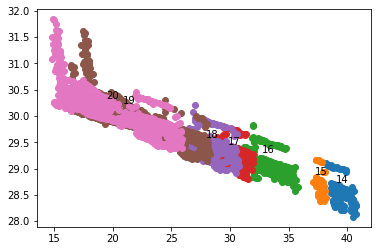

In [14]:
# test for single starting cluster and frame


initialframe = 14
endframe= 20

arrayx = []
arrayy=[]

initialcluster=7

listclusterids = []

listclusterids.append(initialcluster)

obnum = 0


totalmap={}

previndices=[]
currentindices=[]
totalmap = {}

finalarray=[]

xvalues = []
yvalues = []

hxvalues =[]
hyvalues= []

prevmap={}

mf = defaultdict(list)
# maximum object/cluster id in any frame
mx = 20

for j in range(0, mx):
    mf[j]=0 

matchfreq= mf

for i in range(initialframe, endframe+1):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0
    with open(name) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        currentmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")

        if i==initialframe:
            for row in csv_reader:
                # no need for first row skip 
                clusterid = float(row[0])
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    #print("xpt", xpoint)
                    #print("ypt", ypoint)
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    xr = round(xpoint)
                    yr = round(ypoint)
                    fromi = dinvlookupdict[(xr,yr)]
                    h1, i1 = dhighestfreq(fromi)
                    #i1 = newhighestfreq(fromi)
                    prevmap[i1] = 1
            plt.scatter(arrayx, arrayy)

            avx1 = np.mean(arrayx)
            avy1 = np.mean(arrayy)
            plt.annotate(i, (avx1, avy1), textcoords="offset points", xytext=(0,10), ha='center')


            # reset ky 
            ky = initialcluster
            continue

        for row in csv_reader:
            clusterid = float(row[0])

            if clusterid != obnum:
                numo1 = float(obnum)
                # append into dictionary of maps
                totalmap[numo1] = currentmap
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    print("f is", f)
                    ky = numo1

                    hxvalues = xvalues
                    hyvalues = yvalues
                obnum = clusterid

                currentindices=[]
                currentmap= {}

                xvalues =[]
                yvalues =[]
                # append first values
                #xvalues.append(float(row[1]))
                #yvalues.append(float(row[2]))

                continue

            xpoint = float(row[1])
            ypoint = float(row[2])
            xr = round(xpoint)
            yr = round(ypoint)
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)
            # check outlier
            freqo =0 
            if [xr, yr] in listoutliers:
                # determine highest outlier count + coordinates
                listofoutliers = listoutliers2[fromi]
                for outlierpt in listofoutliers:
                    indexo = dinvlookupdict[(outlierpt[0], outlierpt[1])]
                    ocount = doutlier[fromi, indexo]
                    if ocount > freqo:
                        freqo = ocount
                        highindo = indexo
            # compare with dhighestfreq
            if freqo > h1:
                i1 = highindo
            # save to indices
            currentindices.append(i1) 
            # save to map
            currentmap[i1] = 1
            # check prev map
            val = prevmap.get(fromi)
            if val ==None:
                # do nothing
                pass
                #if search2==0:
                #    print("hi")
            else:
                numo = float(obnum)
                matchfreq[numo]= matchfreq[numo]+1
        # check f values at end of file
        numo2 = float(obnum)
        if matchfreq[numo2] > f:
            ky = numo2
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky]= currentmap
        finalarray.append(ky)
        # ky is the cluster id with the highest frequency



        if len(hxvalues) ==0:
            print("0 h vals")
            # break out
            break
        if len(hxvalues) !=0:
            #print("not 0")
            # set prevmap to the one 
            listclusterids.append(ky) # only append if there is next match
            prevmap = totalmap[ky]
        # obnum
        plt.scatter(hxvalues, hyvalues)

        avx = np.mean(hxvalues)
        avy = np.mean(hyvalues)
        plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

In [13]:
# rename

#datastorename = 'datastoreAug16.csv'


def findnextclusterapp(iframe, initialcluster): # frame and cluster
    datastorename = 'newdatastoreMay17.csv'
    outputmatched =0
    rowid = 0
    #datastorename = 'datastoreAug16.csv'
    #if iframe>550:
    #    datastorename='datastoreAug25.csv'
    
    with open(datastorename) as datastore_csv_file:
        datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")

        for row in datastore_csv_reader:
            rowid = rowid+1
            # 1 - frame 
            framenum = float(row[0])

            # 2 - cluster id
            clusterid = float(row[1])

            matched = float(row[18])  #return this matched

            if framenum < iframe:
                continue
                
            if framenum > iframe:
                break

            if clusterid == initialcluster:
                #print("row", rowid)
                #print("frame num", framenum)
                #print("init cluster", initialcluster)
                #print("matched is ", matched)
                outputmatched = matched
                return outputmatched
            
    return outputmatched

# find the next cluster from our algorithm

# iterate over all the clusters in frame len1+1 to see 
# iframe is frame number 

def findnextcluster(iframe, elementclusterarray):  # iframe is the current cluster, clusterarray holds ids of similar clusters 

    ky =0 # if no next cluster
    # sort by increasing order
    #sortedarray = np.sort(clusterarray)
    
    name = "file_out"
    name = name+str(iframe)
    name1 = name+".csv"
    name2 = "file_out"+str(iframe+1)+".csv"

# clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0

    with open(name1) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        countmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")

        for row in csv_reader:
            cid= float(row[0]) 
            # determine which cluster id is the highest 
            xr = round(float(row[1]))
            yr = round(float(row[2]))
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)

            if cid ==  elementclusterarray:
                countmap[i1] = 1

    obnum = 1 

    f = 0                   
    with open(name2) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            cid = float(row[0])
            xr =round(float(row[1]))
            yr = round(float(row[2]))
            fromi = dinvlookupdict[(xr,yr)]
            # next cluster 
            if cid != obnum:
                numo1 = float(obnum)
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    ky = numo1
                obnum = cid

            val = countmap.get(fromi)
            if val != None:
                matchfreq[cid] =matchfreq[cid]+1


    #print(ky, "is the next cluster")     
    return ky

In [27]:
c1= 1
c2 =6
clist = list(range(c1, c2+1))


In [26]:
endarray

[1.0, 3.0, 5.0]

In [28]:
disjoint1(clist, endarray)

[2, 4, 6]

In [25]:
# disjoint where only find if prev matched not in current
def disjoint1(e,f):
    c = e.copy() # [:] works also, but I think this is clearer
    d = f.copy()
    for i in e:
        for j in f:
            if i==j:
                c.remove(i)
                d.remove(j)
    return c

In [29]:
for c in clist:
    print(c)

1
2
3
4
5
6


In [38]:
# add to total plotting array
totalplottingx = []

totalplottingy = []

# map: key is start frame, values is above
xmap = {}
ymap ={}

# make map for the endarrays: key is the ending frame  
endarraymap ={}



In [55]:
r = [10,20,30,40,50,60,70,80, 90, 100]
for e in r:
    endarraymap[e] = []

In [75]:
endarraymap[30]

[2.0, 2.0, 2.0]

In [142]:
# code to find out the num of clusters in the current frame

i = 100 # start frame 
name = "file_out"
name = name+str(i)
name = name+".csv"
firstrow=0

with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")

    for row in csv_reader:
        clusteridfinal = row[0]

print(clusteridfinal)

9


In [134]:
# process similar labeled clusters
frameno=60
simclusters = errorclusters.get(frameno)

ea = endarraymap[frameno]

uea = unique(ea)

##

unew = uea
if simclusters!= None:
    for s in simclusters:
        ni =np.intersect1d(s, unew)
        print(ni)
        if len(ni)>0:
            unew.extend(s)
                

[1.]


In [136]:
errorclusters[60]

[[1, 2]]

In [135]:
unew

[1.0, 1, 2]

In [126]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [97]:
# array1 - array2
np.setdiff1d(list1, unew)

array([ 1,  4,  5,  6,  7,  8,  9, 10])

In [129]:
initialframe

50

carray [3 4 5 6 7 8]
f is 42
0 h vals


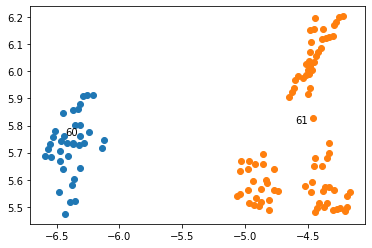

our array, [3, 3.0]
len of our array 2
0 h vals


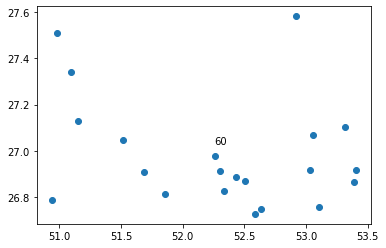

our array, [4]
len of our array 1
0 h vals


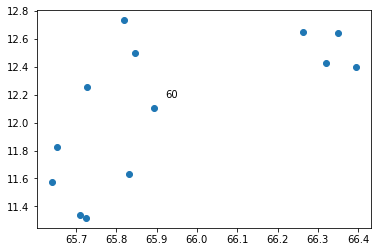

our array, [5]
len of our array 1
f is 9
f is 8
f is 12
0 h vals


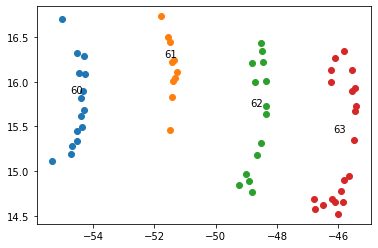

our array, [6, 8.0, 4.0, 5.0]
len of our array 4
continued
array1 [6]
array2 [6, 8.0, 4.0, 5.0]
0 h vals


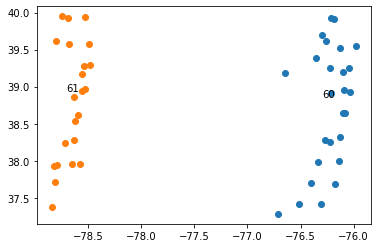

our array, [7, 9.0]
intersect
len of our array 2
0 h vals


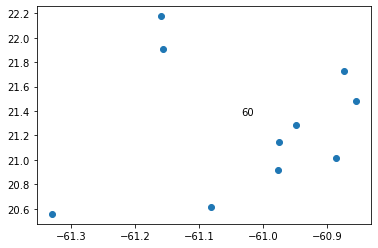

our array, [8]
len of our array 1


In [137]:
#copy 

# complete procedure 2 original -> unique paths


# keep count of total number of comparisons + number of incorrect matches
totalcomparisons = 0

c1 = 1
c2 =8 # 
# change to not include the endarray
ca = list(range(c1, c2+1))

carray = np.setdiff1d(ca, unew)

print("carray", carray)

# new params
totresults = []
totclusterids=[]

#diff. category of accuracy index
missedmatching = 0
wrongmatching =0 # matched to a different cluster
continuedmatching = 0 # continues erroneously 

clustering_error = 0 

#####
initialframe = 60
endframe = 120

endarray=[]

# new params

totalplottingx = []

totalplottingy = []

for c in carray:
    arrayx = []
    arrayy=[]

    initialcluster=c

    listclusterids = []

    listclusterids.append(initialcluster)

    obnum = 0


    totalmap={}

    previndices=[]
    currentindices=[]
    totalmap = {}

    finalarray=[]

    xvalues = []
    yvalues = []

    hxvalues =[]
    hyvalues= []

    prevmap={}

    mf = defaultdict(list)
    # maximum object/cluster id in any frame
    mx = 20

    for j in range(0, mx):
        mf[j]=0 

    matchfreq= mf

    for i in range(initialframe, endframe+1):
        name = "file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear matchfreq
        for j in range(0, mx):
            matchfreq[j] =0
        with open(name) as csv_file:
            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")
            

            if i==initialframe:
                for row in csv_reader:
                    # no need for first row skip 
                    clusterid = float(row[0])
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        #print("xpt", xpoint)
                        #print("ypt", ypoint)
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        xr = round(xpoint)
                        yr = round(ypoint)
                        fromi = dinvlookupdict[(xr,yr)]
                        h1, i1 = dhighestfreq(fromi)
                        #i1 = newhighestfreq(fromi)
                        prevmap[i1] = 1
                plt.scatter(arrayx, arrayy)
    
                avx1 = np.mean(arrayx)
                avy1 = np.mean(arrayy)
                plt.annotate(i, (avx1, avy1), textcoords="offset points", xytext=(0,10), ha='center')

                
                # reset ky 
                ky = initialcluster
                continue

            for row in csv_reader:
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    # append into dictionary of maps
                    totalmap[numo1] = currentmap
                    if matchfreq[numo1] > f:
                        f = matchfreq[numo1]
                        print("f is", f)
                        ky = numo1

                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum = clusterid

                    currentindices=[]
                    currentmap= {}

                    xvalues =[]
                    yvalues =[]
                    # append first values
                    #xvalues.append(float(row[1]))
                    #yvalues.append(float(row[2]))

                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xr = round(xpoint)
                yr = round(ypoint)
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                fromi = dinvlookupdict[(xr,yr)]
                # function to find highest freq 
                h1, i1 = dhighestfreq(fromi)
                # check outlier
                freqo =0 
                if [xr, yr] in listoutliers:
                    # determine highest outlier count + coordinates
                    listofoutliers = listoutliers2[fromi]
                    for outlierpt in listofoutliers:
                        indexo = dinvlookupdict[(outlierpt[0], outlierpt[1])]
                        ocount = doutlier[fromi, indexo]
                        if ocount > freqo:
                            freqo = ocount
                            highindo = indexo
                # compare with dhighestfreq
                if freqo > h1:
                    i1 = highindo
                # save to indices
                currentindices.append(i1) 
                # save to map
                currentmap[i1] = 1
                # check prev map
                val = prevmap.get(fromi)
                if val ==None:
                    # do nothing
                    pass
                    #if search2==0:
                    #    print("hi")
                else:
                    numo = float(obnum)
                    matchfreq[numo]= matchfreq[numo]+1
            # check f values at end of file
            numo2 = float(obnum)
            if matchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap
            finalarray.append(ky)
            # ky is the cluster id with the highest frequency

            # add to array 
            if i % 10 == 0: # change from == endframe to % 10 ==0
                #endarray.append(ky)
                print("i", i)
                print("init cluster", c)
                print("add to array:", ky)
                earray = endarraymap[i]
                earray.append(ky)
                endarraymap[i] = earray
                

            if len(hxvalues) ==0:
                print("0 h vals")
                # break out
                break
            if len(hxvalues) !=0:
                #print("not 0")
                # set prevmap to the one 
                listclusterids.append(ky) # only append if there is next match
                prevmap = totalmap[ky]
            # obnum
            plt.scatter(hxvalues, hyvalues)
            
            totalplottingx.extend(hxvalues)
            totalplottingy.extend(hyvalues)
            
            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')


    plt.show()
    #print("our res. array for initial cluster",c, ":", listclusterids)
    
    currentframe = initialframe

    #initialcluster 
    print("our array,", listclusterids)

    result = []
    result.append(initialcluster)
    
    iframe = initialframe
    currentcluster = initialcluster
    t = True
    while t:
        nextres = findnextclusterapp(iframe, currentcluster)
        if nextres == 0:
            break 
        if str(nextres) == "nan":
            break
        if iframe >= endframe:
            break
        result.append(nextres)
        iframe = iframe+1
        currentcluster = nextres
        
    len1 = len(result) #datastore result
    len2 = len(listclusterids) # our result 

    setlen = min(len1, len2)
    od1 = {}
    od2 = {}
    booleanwrong=[]
    
    for j1 in range(0,setlen):
        nolongerwrong=0
        nolongerwrongoriginal=0
        frameno=initialframe+j1
        od1[frameno]=[result[j1]]
        od2[frameno]=[listclusterids[j1]]
        if result[j1]==listclusterids[j1]:
            nolongerwrong=1
            nolongerwrongoriginal=1
        if result[j1]!= listclusterids[j1]:
            v1 = errorclusters.get(frameno)
            if v1!=None:
                errorarray= errorclusters[frameno]
                for el in errorarray:
                    if result[j1] in el:
                        if listclusterids[j1] in el:
                            nolongerwrong=1
        if nolongerwrong!=1:
            booleanwrong.append(1) # wrong
        else:
            booleanwrong.append(0) # not wrong
            if nolongerwrongoriginal==0:
                clustering_error = clustering_error+1

    maxlen= max(len1, len2)
    last1 = result[setlen-1]
    last2 = listclusterids[setlen-1]
    
    if len1 != len2:
# iterate over setlen to max len
        for j2 in range(setlen, maxlen):
            nolongerwrong=0
            nolongerwrongoriginal = 0 
            frameno2 = initialframe+j2
            if len1 > len2:
                next2 = findnextcluster(frameno2, last2)
                if next2 == result[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if result[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal ==0:
                        clustering_error= clustering_error+1
                else:
                    booleanwrong.append(1)
                last2 = next2
            if len2 > len1:
                next2 = findnextclusterapp(frameno2, last2)
                if next2 == listclusterids[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if listclusterids[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) # wrong
                last2 = next2
    d1 = {}
    d2 = {}
    
    for j1 in range(0, setlen):
        frameno = initialframe+j1
        # check similar clusters
        clusters1 = od1[frameno]
        clusters2 = od2[frameno]

        simclusters = errorclusters.get(frameno)
        if simclusters != None:
            simarray = errorclusters[frameno]
            # check if matches
            for el in simarray:
                if od1[frameno] in el:
                    clusters1.extend(el)
                if od2[frameno] in el:
                    clusters2.extend(el)
        d1[frameno] = clusters1
        d2[frameno] = clusters2
        
    maxlen= max(len1, len2)
    # set original clusters for up to maxlen
    for j2 in range(setlen, maxlen):
        frameno = initialframe+j2
        d1[frameno] = []
        d2[frameno] = []
        if len1>len2:
            d1[frameno]= [result[j2]]
        if len2>len1:
            d2[frameno]=[listclusterids[j2]]

    d1[initialframe+maxlen] = []
    d2[initialframe+maxlen] = []
    setlen = min(len1, len2)
    maxlen= max(len1,len2)
    
    for j in range(0, maxlen):

        frameno = initialframe+j 
        #print("j is", j)
        #print("frame num is", frameno)

        # all clusters within current frame
        clust1 = d1[frameno]
        clust2 = d2[frameno]


        # check clusters to next step
        for c1 in clust1:
            nc1 = findnextclusterapp(frameno, c1)
            if str(nc1) == "nan":
                #print("nc1 is nan")
                continue
            #print("frameno plus one", frameno+1)
            #print("nc1", nc1)
            nclust1 = d1[frameno+1]
            # only append if not already there
            if nc1 not in nclust1:
                nclust1.append(nc1)
            #nclust1.append(nc1)
            #nclust1 = np.unique(nclust1)
            d1[frameno+1] = nclust1
        for c2 in clust2:
            nc2 = findnextcluster(frameno, c2)
            if nc2 == -1:
                continue
            nclust2 = d2[frameno+1]
            if nc2 not in nclust2:
                nclust2.append(nc2)
            d2[frameno+1] = nclust2
        if booleanwrong[j]==1:
            set1 = set(clust1)
            intersect = set1.intersection(clust2)
            if len(intersect)>0:
                print("intersect")
                booleanwrong[j]=0
                clustering_error=clustering_error+1

    bindex = 1
    firstframewrong = -1
    for b in booleanwrong:
        if b == 1:
            firstframewrong = bindex
            break
        bindex= bindex+1

    if firstframewrong == -1:
        totalcomparisons= totalcomparisons+maxlen
    else:
        totalcomparisons= totalcomparisons+firstframewrong
        
    contflag = 0
    missedflag= 0
    
    print("len of our array", len(listclusterids))
    
    if np.sum(booleanwrong) >0:
        if firstframewrong>len1:
            print("continued")
            print("array1", result)
            print("array2", listclusterids)
            contflag= 1
            continuedmatching= continuedmatching+1
        if firstframewrong > len2: 
            print("missed")
            print("array1", result)
            print("array2", listclusterids)
            missedmatching = missedmatching+1
            missedflag=1
        if contflag==0 and missedflag==0:
            print("wrong")
            print("array1", result)
            print("array2", listclusterids)
            wrongmatching= wrongmatching+1
        
        if contflag==1 and missedflag==1:
            print("BOTH CONTINUED AND MISSED")
    
                

    

In [132]:
endarraymap[60]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [138]:
initialframe

60

In [ ]:
#  same as above but nested for mult starting frames



startingframes = [70, 80, 90, 100]
ncluststart = [11, 7, 8, 9]

ind = 0

for st in startingframes:
    
    # process similar labeled clusters
    frameno= st
    simclusters = errorclusters.get(frameno)

    ea = endarraymap[frameno]

    uea = unique(ea)

    ##

    unew = uea
    if simclusters!= None:
        for s in simclusters:
            ni =np.intersect1d(s, unew)
            print(ni)
            if len(ni)>0:
                unew.extend(s)
                
    totalcomparisons = 0

    c1 = 1
    c2 = ncluststart[ind] # 
    # change to not include the endarray
    ca = list(range(c1, c2+1))

    carray = np.setdiff1d(ca, unew)

    print("starting frame", st)
    print("carray", carray)

    # new params
    totresults = []
    totclusterids=[]

    #diff. category of accuracy index
    missedmatching = 0
    wrongmatching =0 # matched to a different cluster
    continuedmatching = 0 # continues erroneously 

    clustering_error = 0 

    #####
    initialframe = st
    endframe = st+50

    endarray=[]
        
    ind = ind+1

    for c in carray:
        arrayx = []
        arrayy=[]

        initialcluster=c

        listclusterids = []

        listclusterids.append(initialcluster)

        obnum = 0


        totalmap={}

        previndices=[]
        currentindices=[]
        totalmap = {}

        finalarray=[]

        xvalues = []
        yvalues = []

        hxvalues =[]
        hyvalues= []

        prevmap={}

        mf = defaultdict(list)
        # maximum object/cluster id in any frame
        mx = 20

        for j in range(0, mx):
            mf[j]=0 

        matchfreq= mf

        for i in range(initialframe, endframe+1):
            name = "file_out"
            name = name+str(i)
            name = name+".csv"
            firstrow=0
            # clear matchfreq
            for j in range(0, mx):
                matchfreq[j] =0
            with open(name) as csv_file:
                f =0 
                # reset hxvalues , hyvalues
                hxvalues = []
                hyvalues=[]

                currentmap= {}

                csv_reader = csv.reader(csv_file, delimiter=",")


                if i==initialframe:
                    for row in csv_reader:
                        # no need for first row skip 
                        clusterid = float(row[0])
                        if clusterid==initialcluster:
                            xpoint = float(row[1])
                            ypoint = float(row[2])
                            #print("xpt", xpoint)
                            #print("ypt", ypoint)
                            arrayx.append(xpoint)
                            arrayy.append(ypoint)
                            xr = round(xpoint)
                            yr = round(ypoint)
                            fromi = dinvlookupdict[(xr,yr)]
                            h1, i1 = dhighestfreq(fromi)
                            #i1 = newhighestfreq(fromi)
                            prevmap[i1] = 1
                    plt.scatter(arrayx, arrayy)

                    avx1 = np.mean(arrayx)
                    avy1 = np.mean(arrayy)
                    plt.annotate(i, (avx1, avy1), textcoords="offset points", xytext=(0,10), ha='center')


                    # reset ky 
                    ky = initialcluster
                    continue

                for row in csv_reader:
                    clusterid = float(row[0])

                    if clusterid != obnum:
                        numo1 = float(obnum)
                        # append into dictionary of maps
                        totalmap[numo1] = currentmap
                        if matchfreq[numo1] > f:
                            f = matchfreq[numo1]
                            print("f is", f)
                            ky = numo1

                            hxvalues = xvalues
                            hyvalues = yvalues
                        obnum = clusterid

                        currentindices=[]
                        currentmap= {}

                        xvalues =[]
                        yvalues =[]
                        # append first values
                        #xvalues.append(float(row[1]))
                        #yvalues.append(float(row[2]))

                        continue

                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    xr = round(xpoint)
                    yr = round(ypoint)
                    xvalues.append(xpoint) # save to array 
                    yvalues.append(ypoint)
                    fromi = dinvlookupdict[(xr,yr)]
                    # function to find highest freq 
                    h1, i1 = dhighestfreq(fromi)
                    # check outlier
                    freqo =0 
                    if [xr, yr] in listoutliers:
                        # determine highest outlier count + coordinates
                        listofoutliers = listoutliers2[fromi]
                        for outlierpt in listofoutliers:
                            indexo = dinvlookupdict[(outlierpt[0], outlierpt[1])]
                            ocount = doutlier[fromi, indexo]
                            if ocount > freqo:
                                freqo = ocount
                                highindo = indexo
                    # compare with dhighestfreq
                    if freqo > h1:
                        i1 = highindo
                    # save to indices
                    currentindices.append(i1) 
                    # save to map
                    currentmap[i1] = 1
                    # check prev map
                    val = prevmap.get(fromi)
                    if val ==None:
                        # do nothing
                        pass
                        #if search2==0:
                        #    print("hi")
                    else:
                        numo = float(obnum)
                        matchfreq[numo]= matchfreq[numo]+1
                # check f values at end of file
                numo2 = float(obnum)
                if matchfreq[numo2] > f:
                    ky = numo2
                    hxvalues = xvalues
                    hyvalues = yvalues
                    totalmap[ky]= currentmap
                finalarray.append(ky)
                # ky is the cluster id with the highest frequency

                # add to array 
                if i % 10 == 0: # change from == endframe to % 10 ==0
                    #endarray.append(ky)
                    print("i", i)
                    print("init cluster", c)
                    print("add to array:", ky)
                    earray = endarraymap[i]
                    earray.append(ky)
                    endarraymap[i] = earray


                if len(hxvalues) ==0:
                    print("0 h vals")
                    # break out
                    break
                if len(hxvalues) !=0:
                    #print("not 0")
                    # set prevmap to the one 
                    listclusterids.append(ky) # only append if there is next match
                    prevmap = totalmap[ky]
                # obnum
                plt.scatter(hxvalues, hyvalues)

                totalplottingx.extend(hxvalues)
                totalplottingy.extend(hyvalues)

                avx = np.mean(hxvalues)
                avy = np.mean(hyvalues)
                plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')


        plt.show()
        #print("our res. array for initial cluster",c, ":", listclusterids)

        currentframe = initialframe

        #initialcluster 
        print("our array,", listclusterids)

        result = []
        result.append(initialcluster)

        iframe = initialframe
        currentcluster = initialcluster
        t = True
        while t:
            nextres = findnextclusterapp(iframe, currentcluster)
            if nextres == 0:
                break 
            if str(nextres) == "nan":
                break
            if iframe >= endframe:
                break
            result.append(nextres)
            iframe = iframe+1
            currentcluster = nextres

        len1 = len(result) #datastore result
        len2 = len(listclusterids) # our result 

        setlen = min(len1, len2)
        od1 = {}
        od2 = {}
        booleanwrong=[]

        for j1 in range(0,setlen):
            nolongerwrong=0
            nolongerwrongoriginal=0
            frameno=initialframe+j1
            od1[frameno]=[result[j1]]
            od2[frameno]=[listclusterids[j1]]
            if result[j1]==listclusterids[j1]:
                nolongerwrong=1
                nolongerwrongoriginal=1
            if result[j1]!= listclusterids[j1]:
                v1 = errorclusters.get(frameno)
                if v1!=None:
                    errorarray= errorclusters[frameno]
                    for el in errorarray:
                        if result[j1] in el:
                            if listclusterids[j1] in el:
                                nolongerwrong=1
            if nolongerwrong!=1:
                booleanwrong.append(1) # wrong
            else:
                booleanwrong.append(0) # not wrong
                if nolongerwrongoriginal==0:
                    clustering_error = clustering_error+1

        maxlen= max(len1, len2)
        last1 = result[setlen-1]
        last2 = listclusterids[setlen-1]

        if len1 != len2:
    # iterate over setlen to max len
            for j2 in range(setlen, maxlen):
                nolongerwrong=0
                nolongerwrongoriginal = 0 
                frameno2 = initialframe+j2
                if len1 > len2:
                    next2 = findnextcluster(frameno2, last2)
                    if next2 == result[j2]:
                        nolongerwrong=1
                        nolongerwrongoriginal=1
                    v2 = errorclusters.get(frameno2)
                    if v2 != None:
                        errorarray = errorclusters[frameno2]
                        for el in errorarray:
                            if result[j2] in el:
                                if next2 in el:
                                    nolongerwrong=1
                    if nolongerwrong==1:
                        booleanwrong.append(0)
                        if nolongerwrongoriginal ==0:
                            clustering_error= clustering_error+1
                    else:
                        booleanwrong.append(1)
                    last2 = next2
                if len2 > len1:
                    next2 = findnextclusterapp(frameno2, last2)
                    if next2 == listclusterids[j2]:
                        nolongerwrong=1
                        nolongerwrongoriginal=1
                    v2 = errorclusters.get(frameno2)
                    if v2 != None:
                        errorarray = errorclusters[frameno2]
                        for el in errorarray:
                            if listclusterids[j2] in el:
                                if next2 in el:
                                    nolongerwrong=1
                    if nolongerwrong==1:
                        booleanwrong.append(0)
                        if nolongerwrongoriginal==0:
                            clustering_error=clustering_error+1
                    else:
                        booleanwrong.append(1) # wrong
                    last2 = next2
        d1 = {}
        d2 = {}

        for j1 in range(0, setlen):
            frameno = initialframe+j1
            # check similar clusters
            clusters1 = od1[frameno]
            clusters2 = od2[frameno]

            simclusters = errorclusters.get(frameno)
            if simclusters != None:
                simarray = errorclusters[frameno]
                # check if matches
                for el in simarray:
                    if od1[frameno] in el:
                        clusters1.extend(el)
                    if od2[frameno] in el:
                        clusters2.extend(el)
            d1[frameno] = clusters1
            d2[frameno] = clusters2

        maxlen= max(len1, len2)
        # set original clusters for up to maxlen
        for j2 in range(setlen, maxlen):
            frameno = initialframe+j2
            d1[frameno] = []
            d2[frameno] = []
            if len1>len2:
                d1[frameno]= [result[j2]]
            if len2>len1:
                d2[frameno]=[listclusterids[j2]]

        d1[initialframe+maxlen] = []
        d2[initialframe+maxlen] = []
        setlen = min(len1, len2)
        maxlen= max(len1,len2)

        for j in range(0, maxlen):

            frameno = initialframe+j 
            #print("j is", j)
            #print("frame num is", frameno)

            # all clusters within current frame
            clust1 = d1[frameno]
            clust2 = d2[frameno]


            # check clusters to next step
            for c1 in clust1:
                nc1 = findnextclusterapp(frameno, c1)
                if str(nc1) == "nan":
                    #print("nc1 is nan")
                    continue
                #print("frameno plus one", frameno+1)
                #print("nc1", nc1)
                nclust1 = d1[frameno+1]
                # only append if not already there
                if nc1 not in nclust1:
                    nclust1.append(nc1)
                #nclust1.append(nc1)
                #nclust1 = np.unique(nclust1)
                d1[frameno+1] = nclust1
            for c2 in clust2:
                nc2 = findnextcluster(frameno, c2)
                if nc2 == -1:
                    continue
                nclust2 = d2[frameno+1]
                if nc2 not in nclust2:
                    nclust2.append(nc2)
                d2[frameno+1] = nclust2
            if booleanwrong[j]==1:
                set1 = set(clust1)
                intersect = set1.intersection(clust2)
                if len(intersect)>0:
                    print("intersect")
                    booleanwrong[j]=0
                    clustering_error=clustering_error+1

        bindex = 1
        firstframewrong = -1
        for b in booleanwrong:
            if b == 1:
                firstframewrong = bindex
                break
            bindex= bindex+1

        if firstframewrong == -1:
            totalcomparisons= totalcomparisons+maxlen
        else:
            totalcomparisons= totalcomparisons+firstframewrong

        contflag = 0
        missedflag= 0

        print("len of our array", len(listclusterids))

        if np.sum(booleanwrong) >0:
            if firstframewrong>len1:
                print("continued")
                print("array1", result)
                print("array2", listclusterids)
                contflag= 1
                continuedmatching= continuedmatching+1
            if firstframewrong > len2: 
                print("missed")
                print("array1", result)
                print("array2", listclusterids)
                missedmatching = missedmatching+1
                missedflag=1
            if contflag==0 and missedflag==0:
                print("wrong")
                print("array1", result)
                print("array2", listclusterids)
                wrongmatching= wrongmatching+1

            if contflag==1 and missedflag==1:
                print("BOTH CONTINUED AND MISSED")
    
                

f is 38
0 h vals


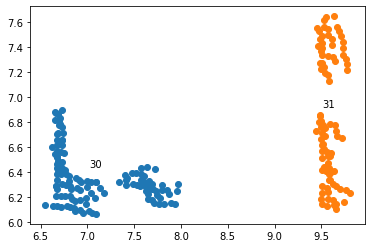

our array, [1, 1.0]
len of our array 2
missed
array1 [1, 1.0, 8.0, 9.0, 9.0, 11.0]
array2 [1, 1.0]
f is 21
f is 498
f is 573
f is 475
f is 450
f is 370
f is 52
f is 270
f is 65
f is 226
f is 11
f is 157
f is 98
f is 109
f is 25
f is 23
f is 24
f is 49
0 h vals


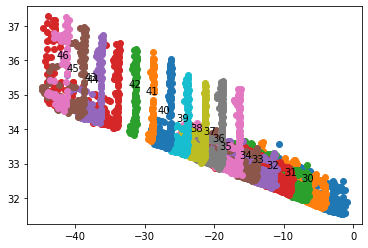

our array, [2, 4.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 6.0, 6.0, 8.0, 7.0, 6.0, 11.0, 11.0, 12.0, 10.0]
intersect
intersect
len of our array 17
wrong
array1 [2, 4.0, 2.0, 3.0, 4.0, 5.0, 5.0, 6.0, 5.0, 7.0, 8.0, 7.0, 6.0, 8.0, 11.0]
array2 [2, 4.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 6.0, 6.0, 8.0, 7.0, 6.0, 11.0, 11.0, 12.0, 10.0]
0 h vals


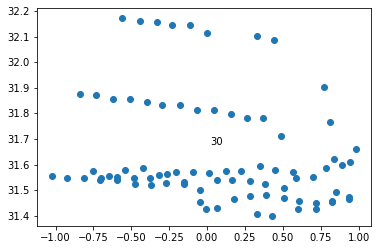

our array, [3]
len of our array 1
missed
array1 [3, 4.0, 2.0, 3.0, 4.0, 5.0, 5.0, 6.0, 5.0, 7.0, 8.0, 7.0, 6.0, 8.0, 11.0]
array2 [3]
0 h vals


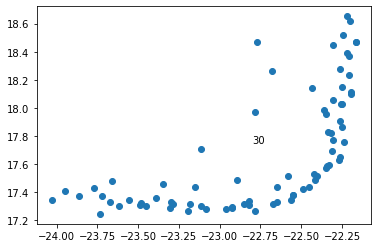

our array, [4]
len of our array 1
f is 89
f is 99
f is 59
f is 86
f is 33
f is 2
f is 34
f is 42
f is 51
f is 23
f is 34
f is 29
f is 17
0 h vals


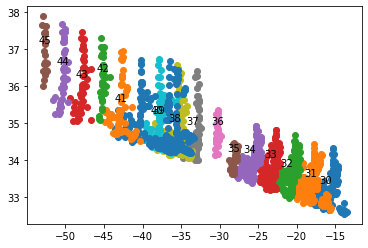

our array, [5, 3.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 11.0, 10.0, 10.0, 11.0, 9.0, 10.0, 9.0, 10.0]
intersect
intersect
intersect
intersect
intersect
intersect
intersect
len of our array 16
f is 15
f is 11
0 h vals


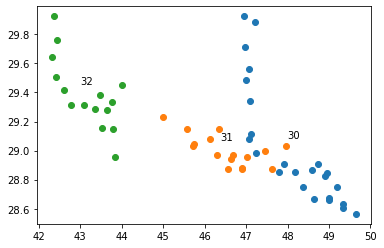

our array, [6, 6.0, 4.0]
len of our array 3
missed
array1 [6, 6.0, 4.0, 5.0, 6.0]
array2 [6, 6.0, 4.0]
f is 10
f is 17
f is 8
f is 10
f is 13
0 h vals


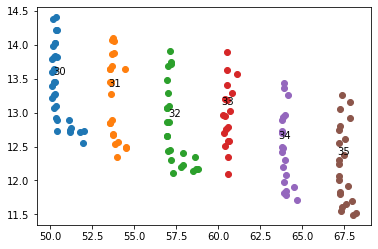

our array, [7, 8.0, 5.0, 6.0, 7.0, 7.0]
len of our array 6
f is 10
f is 11
f is 7
0 h vals


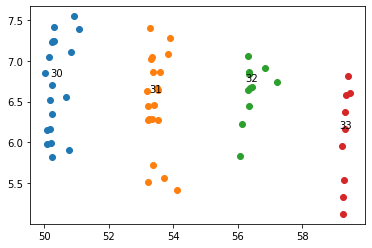

our array, [8, 9.0, 6.0, 7.0]
len of our array 4
0 h vals


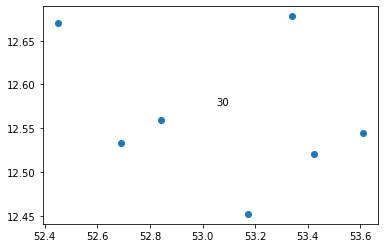

our array, [9]
len of our array 1
missed
array1 [9, 8.0, 5.0, 6.0, 7.0, 7.0]
array2 [9]
f is 8
f is 11
f is 11
f is 8
0 h vals


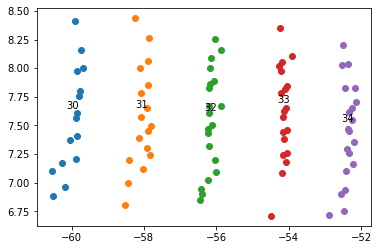

our array, [10, 10.0, 7.0, 8.0, 8.0]
len of our array 5
continued
array1 [10, 10.0]
array2 [10, 10.0, 7.0, 8.0, 8.0]
f is 2
f is 67
f is 76
f is 18
f is 65
f is 78
f is 136
f is 147
f is 226
f is 374
f is 66
f is 248
f is 58
f is 82
f is 273
f is 279
f is 283
f is 322
f is 245
f is 121
0 h vals


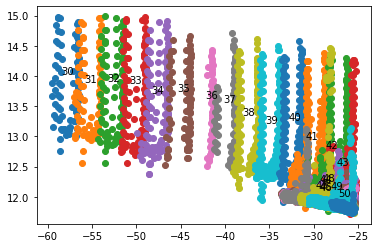

our array, [11, 12.0, 9.0, 10.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 7.0, 6.0, 5.0, 7.0, 1.0, 7.0, 6.0, 7.0, 5.0, 6.0, 6.0]
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
intersect
len of our array 21


In [101]:
# complete procedure 2 original -> unique paths


# keep count of total number of comparisons + number of incorrect matches
totalcomparisons = 0

c1 = 1
c2 = 11
# change to not include the endarray
ca = list(range(c1, c2+1))

#carray = disjoint1(clist, endarray)
carray = ca # for beginning

# new params
totresults = []
totclusterids=[]

#diff. category of accuracy index
missedmatching = 0
wrongmatching =0 # matched to a different cluster
continuedmatching = 0 # continues erroneously 

clustering_error = 0 

#####
initialframe = 30
endframe = 80

endarray=[]

# new params

totalplottingx = []

totalplottingy = []

for c in carray:
    arrayx = []
    arrayy=[]

    initialcluster=c

    listclusterids = []

    listclusterids.append(initialcluster)

    obnum = 0


    totalmap={}

    previndices=[]
    currentindices=[]
    totalmap = {}

    finalarray=[]

    xvalues = []
    yvalues = []

    hxvalues =[]
    hyvalues= []

    prevmap={}

    mf = defaultdict(list)
    # maximum object/cluster id in any frame
    mx = 20

    for j in range(0, mx):
        mf[j]=0 

    matchfreq= mf

    for i in range(initialframe, endframe+1):
        name = "file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear matchfreq
        for j in range(0, mx):
            matchfreq[j] =0
        with open(name) as csv_file:
            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")
            

            if i==initialframe:
                for row in csv_reader:
                    # no need for first row skip 
                    clusterid = float(row[0])
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        #print("xpt", xpoint)
                        #print("ypt", ypoint)
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        xr = round(xpoint)
                        yr = round(ypoint)
                        fromi = dinvlookupdict[(xr,yr)]
                        h1, i1 = dhighestfreq(fromi)
                        #i1 = newhighestfreq(fromi)
                        prevmap[i1] = 1
                plt.scatter(arrayx, arrayy)
    
                avx1 = np.mean(arrayx)
                avy1 = np.mean(arrayy)
                plt.annotate(i, (avx1, avy1), textcoords="offset points", xytext=(0,10), ha='center')

                
                # reset ky 
                ky = initialcluster
                continue

            for row in csv_reader:
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    # append into dictionary of maps
                    totalmap[numo1] = currentmap
                    if matchfreq[numo1] > f:
                        f = matchfreq[numo1]
                        print("f is", f)
                        ky = numo1

                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum = clusterid

                    currentindices=[]
                    currentmap= {}

                    xvalues =[]
                    yvalues =[]
                    # append first values
                    #xvalues.append(float(row[1]))
                    #yvalues.append(float(row[2]))

                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xr = round(xpoint)
                yr = round(ypoint)
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                fromi = dinvlookupdict[(xr,yr)]
                # function to find highest freq 
                h1, i1 = dhighestfreq(fromi)
                # check outlier
                freqo =0 
                if [xr, yr] in listoutliers:
                    # determine highest outlier count + coordinates
                    listofoutliers = listoutliers2[fromi]
                    for outlierpt in listofoutliers:
                        indexo = dinvlookupdict[(outlierpt[0], outlierpt[1])]
                        ocount = doutlier[fromi, indexo]
                        if ocount > freqo:
                            freqo = ocount
                            highindo = indexo
                # compare with dhighestfreq
                if freqo > h1:
                    i1 = highindo
                # save to indices
                currentindices.append(i1) 
                # save to map
                currentmap[i1] = 1
                # check prev map
                val = prevmap.get(fromi)
                if val ==None:
                    # do nothing
                    pass
                    #if search2==0:
                    #    print("hi")
                else:
                    numo = float(obnum)
                    matchfreq[numo]= matchfreq[numo]+1
            # check f values at end of file
            numo2 = float(obnum)
            if matchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap
            finalarray.append(ky)
            # ky is the cluster id with the highest frequency

            # add to array 
            if i==endframe: # change to % 10 
                endarray.append(ky)

            if len(hxvalues) ==0:
                print("0 h vals")
                # break out
                break
            if len(hxvalues) !=0:
                #print("not 0")
                # set prevmap to the one 
                listclusterids.append(ky) # only append if there is next match
                prevmap = totalmap[ky]
            # obnum
            plt.scatter(hxvalues, hyvalues)
            
            totalplottingx.extend(hxvalues)
            totalplottingy.extend(hyvalues)
            
            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')


    plt.show()
    #print("our res. array for initial cluster",c, ":", listclusterids)
    
    currentframe = initialframe

    #initialcluster 
    print("our array,", listclusterids)

    result = []
    result.append(initialcluster)
    
    iframe = initialframe
    currentcluster = initialcluster
    t = True
    while t:
        nextres = findnextclusterapp(iframe, currentcluster)
        if nextres == 0:
            break 
        if str(nextres) == "nan":
            break
        if iframe >= endframe:
            break
        result.append(nextres)
        iframe = iframe+1
        currentcluster = nextres
        
    len1 = len(result) #datastore result
    len2 = len(listclusterids) # our result 

    setlen = min(len1, len2)
    od1 = {}
    od2 = {}
    booleanwrong=[]
    
    for j1 in range(0,setlen):
        nolongerwrong=0
        nolongerwrongoriginal=0
        frameno=initialframe+j1
        od1[frameno]=[result[j1]]
        od2[frameno]=[listclusterids[j1]]
        if result[j1]==listclusterids[j1]:
            nolongerwrong=1
            nolongerwrongoriginal=1
        if result[j1]!= listclusterids[j1]:
            v1 = errorclusters.get(frameno)
            if v1!=None:
                errorarray= errorclusters[frameno]
                for el in errorarray:
                    if result[j1] in el:
                        if listclusterids[j1] in el:
                            nolongerwrong=1
        if nolongerwrong!=1:
            booleanwrong.append(1) # wrong
        else:
            booleanwrong.append(0) # not wrong
            if nolongerwrongoriginal==0:
                clustering_error = clustering_error+1

    maxlen= max(len1, len2)
    last1 = result[setlen-1]
    last2 = listclusterids[setlen-1]
    
    if len1 != len2:
# iterate over setlen to max len
        for j2 in range(setlen, maxlen):
            nolongerwrong=0
            nolongerwrongoriginal = 0 
            frameno2 = initialframe+j2
            if len1 > len2:
                next2 = findnextcluster(frameno2, last2)
                if next2 == result[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if result[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal ==0:
                        clustering_error= clustering_error+1
                else:
                    booleanwrong.append(1)
                last2 = next2
            if len2 > len1:
                next2 = findnextclusterapp(frameno2, last2)
                if next2 == listclusterids[j2]:
                    nolongerwrong=1
                    nolongerwrongoriginal=1
                v2 = errorclusters.get(frameno2)
                if v2 != None:
                    errorarray = errorclusters[frameno2]
                    for el in errorarray:
                        if listclusterids[j2] in el:
                            if next2 in el:
                                nolongerwrong=1
                if nolongerwrong==1:
                    booleanwrong.append(0)
                    if nolongerwrongoriginal==0:
                        clustering_error=clustering_error+1
                else:
                    booleanwrong.append(1) # wrong
                last2 = next2
    d1 = {}
    d2 = {}
    
    for j1 in range(0, setlen):
        frameno = initialframe+j1
        # check similar clusters
        clusters1 = od1[frameno]
        clusters2 = od2[frameno]

        simclusters = errorclusters.get(frameno)
        if simclusters != None:
            simarray = errorclusters[frameno]
            # check if matches
            for el in simarray:
                if od1[frameno] in el:
                    clusters1.extend(el)
                if od2[frameno] in el:
                    clusters2.extend(el)
        d1[frameno] = clusters1
        d2[frameno] = clusters2
        
    maxlen= max(len1, len2)
    # set original clusters for up to maxlen
    for j2 in range(setlen, maxlen):
        frameno = initialframe+j2
        d1[frameno] = []
        d2[frameno] = []
        if len1>len2:
            d1[frameno]= [result[j2]]
        if len2>len1:
            d2[frameno]=[listclusterids[j2]]

    d1[initialframe+maxlen] = []
    d2[initialframe+maxlen] = []
    setlen = min(len1, len2)
    maxlen= max(len1,len2)
    
    for j in range(0, maxlen):

        frameno = initialframe+j 
        #print("j is", j)
        #print("frame num is", frameno)

        # all clusters within current frame
        clust1 = d1[frameno]
        clust2 = d2[frameno]


        # check clusters to next step
        for c1 in clust1:
            nc1 = findnextclusterapp(frameno, c1)
            if str(nc1) == "nan":
                #print("nc1 is nan")
                continue
            #print("frameno plus one", frameno+1)
            #print("nc1", nc1)
            nclust1 = d1[frameno+1]
            # only append if not already there
            if nc1 not in nclust1:
                nclust1.append(nc1)
            #nclust1.append(nc1)
            #nclust1 = np.unique(nclust1)
            d1[frameno+1] = nclust1
        for c2 in clust2:
            nc2 = findnextcluster(frameno, c2)
            if nc2 == -1:
                continue
            nclust2 = d2[frameno+1]
            if nc2 not in nclust2:
                nclust2.append(nc2)
            d2[frameno+1] = nclust2
        if booleanwrong[j]==1:
            set1 = set(clust1)
            intersect = set1.intersection(clust2)
            if len(intersect)>0:
                print("intersect")
                booleanwrong[j]=0
                clustering_error=clustering_error+1

    bindex = 1
    firstframewrong = -1
    for b in booleanwrong:
        if b == 1:
            firstframewrong = bindex
            break
        bindex= bindex+1

    if firstframewrong == -1:
        totalcomparisons= totalcomparisons+maxlen
    else:
        totalcomparisons= totalcomparisons+firstframewrong
        
    contflag = 0
    missedflag= 0
    
    print("len of our array", len(listclusterids))
    
    if np.sum(booleanwrong) >0:
        if firstframewrong>len1:
            print("continued")
            print("array1", result)
            print("array2", listclusterids)
            contflag= 1
            continuedmatching= continuedmatching+1
        if firstframewrong > len2: 
            print("missed")
            print("array1", result)
            print("array2", listclusterids)
            missedmatching = missedmatching+1
            missedflag=1
        if contflag==0 and missedflag==0:
            print("wrong")
            print("array1", result)
            print("array2", listclusterids)
            wrongmatching= wrongmatching+1
        
        if contflag==1 and missedflag==1:
            print("BOTH CONTINUED AND MISSED")
    
                

    

In [102]:
unew

[2.0, 2, 3]

In [19]:
endarray
# process similar labeled clusters


[1.0, 3.0, 5.0]

In [65]:
uea = unique(ea)

In [67]:
u2 = [1,1,1]
for s in simclusters:
    ni2 = np.intersect1d(s, u2)
    print(ni2)

[]


In [68]:
# process similar labeled clusters
frameno=20
simclusters = errorclusters.get(frameno)

ea = endarraymap[frameno]

uea = unique(ea)

##

unew = uea
if simclusters!= None:
    for s in simclusters:
        ni =np.intersect1d(s, unew)
        print(ni)
        if len(ni)>0:
            unew.extend(s)
                

[3.]


In [70]:
unique(unew)

[1.0, 2, 3.0, 5.0]

In [16]:
# load errorclusters
#THIS ONE 
# error clusters 


# pre processing step: load lidar_similarlabeledclusters.csv
import csv
# dictionary mapping framenumber to array of clusterids
errorclusters = {}

firstrow =0


#lidarsim = 'lidar_similarlabeledclusters.csv'
lidarsim = 'lidar_similarlabeledclusters_v2.csv'


#lidarsim='lidar_similar301-600.csv'
with open(lidarsim) as lidarsim_csv_file:
    sim_csv_reader = csv.reader(lidarsim_csv_file, delimiter=",")
    for row in sim_csv_reader:
        # skip header row
        if firstrow==0:
            firstrow=1
            continue
        framenumber = int(row[0])
        arr = []
        cluster1 = row[1]
        cluster2 = row[2]
        cluster3 = row[3]
        arr.append(int(cluster1))
        if len(cluster2) > 0:
            arr.append(int(cluster2))
        if len(cluster3) >0:
            arr.append(int(cluster3))
        #print(row)
        errorcode = int(row[4])
        if errorcode == 1:
            # add to dictionary
            #print("add")
            v = errorclusters.get(framenumber)
            if v==None:
                errorclusters[framenumber] = [arr]
            else:
            # append additional array
                a = errorclusters[framenumber]
                alen = len(a)
                em = []
                for i in range(0, alen):
                    em.append(a[i])
                em.append(arr)
                
                errorclusters[framenumber] = em
            